# ATMOS 2022 - Station Analysis

---------

## 0. Import Libraries

In [2]:
import matplotlib.pyplot as plt
import proplot

from utils.data import *
from utils.utils import *
from utils.visualization_codes import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## 1. Open Data

In [3]:
province = 'ankara'
dt = retrieve_station(province)

In [3]:
dt

,Year,Month,Day,Hour,17127,17128,17129,17130,17131,17134,17137,17651,17664,17679,17680,17715,17728,17729,17731,17733
0,2009,1,1,0,-8.7,-13.0,-9.0,-7.7,-8.5,-12.6,-13.8,-999.0,-5.6,-2.3,-8.2,-999.0,-10.1,-10.7,-10.4,-13.8
1,2009,1,1,1,-9.0,-13.2,-9.0,-7.8,-8.0,-11.4,-13.3,-999.0,-5.9,-2.2,-8.3,-999.0,-10.5,-11.0,-11.0,-14.5
2,2009,1,1,2,-9.3,-13.7,-8.7,-8.1,-8.9,-12.0,-12.9,-999.0,-5.9,-2.1,-7.8,-999.0,-11.2,-11.4,-11.0,-12.7
3,2009,1,1,3,-8.7,-12.1,-8.8,-8.2,-8.8,-11.7,-12.8,-999.0,-5.4,-3.9,-8.0,-999.0,-11.3,-10.3,-11.0,-13.6
4,2009,1,1,4,-8.8,-12.4,-8.7,-7.7,-9.0,-12.7,-13.0,-999.0,-6.6,-4.4,-7.8,-999.0,-11.3,-10.8,-11.2,-12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2018,12,31,19,-2.4,-3.8,-1.6,-1.2,-1.6,-5.8,-6.3,-3.4,-3.4,0.1,0.0,-4.1,-1.7,-5.0,-3.1,-5.0
87644,2018,12,31,20,-1.9,-3.3,-1.5,-1.3,-1.4,-5.9,-7.7,-3.2,-3.3,0.0,0.0,-4.5,-2.7,-5.0,-3.2,-4.7
87645,2018,12,31,21,-2.0,-2.8,-1.4,-1.7,-1.3,-5.8,-7.9,-3.2,-3.3,0.0,0.0,-4.5,-2.3,-5.1,-3.4,-4.8
87646,2018,12,31,22,-2.0,-3.1,-1.3,-1.8,-1.7,-7.1,-999.0,-3.3,-3.2,0.0,-0.1,-4.5,-2.4,-5.1,-3.6,-4.7


In [4]:
dt.attrs

{'data-source': 'station',
 'var-name': 'T',
 'unit': 'degC',
 'province': 'ankara'}

In [5]:
# dates queried: 2011 to 2018
date_query = list(range(2011, 2019))
dt = dt.query(f'Year in {date_query}').reset_index(drop=True)

In [6]:
dt

,Year,Month,Day,Hour,17127,17128,17129,17130,17131,17134,17137,17651,17664,17679,17680,17715,17728,17729,17731,17733
0,2011,1,1,0,-2.2,-4.1,-3.3,-1.4,-2.5,-2.6,-6.7,-3.5,-5.9,-0.6,-0.7,-2.3,-2.8,-3.1,-0.9,-3.5
1,2011,1,1,1,-2.0,-3.4,-2.2,-1.7,-2.5,-3.8,-6.5,-3.1,-5.8,-1.5,-1.4,-3.5,-3.3,-2.7,-1.5,-3.9
2,2011,1,1,2,-1.9,-4.3,-2.5,-1.4,-1.8,-3.9,-6.6,-3.8,-6.3,-2.0,-1.6,-3.2,-3.9,-2.9,-1.3,-4.9
3,2011,1,1,3,-3.0,-5.1,-2.6,-1.0,-2.0,-2.3,-6.9,-3.4,-7.0,-2.3,-1.3,-2.8,-4.3,-3.6,-1.4,-4.3
4,2011,1,1,4,-3.9,-4.5,-3.0,-1.1,-2.1,-2.7,-7.2,-4.4,-7.3,-2.8,-0.8,-2.8,-4.7,-3.1,-2.3,-4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,2018,12,31,19,-2.4,-3.8,-1.6,-1.2,-1.6,-5.8,-6.3,-3.4,-3.4,0.1,0.0,-4.1,-1.7,-5.0,-3.1,-5.0
70124,2018,12,31,20,-1.9,-3.3,-1.5,-1.3,-1.4,-5.9,-7.7,-3.2,-3.3,0.0,0.0,-4.5,-2.7,-5.0,-3.2,-4.7
70125,2018,12,31,21,-2.0,-2.8,-1.4,-1.7,-1.3,-5.8,-7.9,-3.2,-3.3,0.0,0.0,-4.5,-2.3,-5.1,-3.4,-4.8
70126,2018,12,31,22,-2.0,-3.1,-1.3,-1.8,-1.7,-7.1,-999.0,-3.3,-3.2,0.0,-0.1,-4.5,-2.4,-5.1,-3.6,-4.7


### 1.1 Get Metadata

In [4]:
metadata = get_station_metadata(province)
metadata

,station,location,y,x,height
0,17127,akıncı airport,40.0788,32.5657,837
1,17128,esenboğa airport,40.1240,32.9992,958
2,17129,etimesgut airport,39.9558,32.6854,807
3,17130,ankara bölge,39.9727,32.8637,890
4,17131,güvercinlik airport,39.9343,32.7387,819
5,17134,ufuk danışment,39.8032,32.8434,1098
6,17137,elmadağ radar,39.7985,32.9716,1797
7,17651,polatlı tigem,39.1525,32.1283,940
8,17664,kızılcahamam,40.4729,32.6441,1030
9,17679,nallıhan,40.1733,31.3320,648


In [5]:
metadata.attrs

{'data-source': 'station metadata', 'province': 'ankara', 'height-unit': 'm'}

## 2. Show Stations on the Land-Use Map

### 2.1 Get Corine Data

In [6]:
corine = retrieve_corine(province).sel(time=2018)

In [11]:
corine

<xarray.DataArray (y: 2067, x: 2853)>
dask.array<getitem, shape=(2067, 2853), dtype=float64, chunksize=(1976, 2600), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 2.248e+06 2.247e+06 ... 2.041e+06 2.041e+06
  * x            (x) float64 6.079e+06 6.079e+06 ... 6.364e+06 6.364e+06
    band         int64 1
    time         int64 2018
    spatial_ref  int64 0
Attributes: (12/13)
    RepresentationType:      THEMATIC
    STATISTICS_COVARIANCES:  139.8656147919413
    STATISTICS_MAXIMUM:      48
    STATISTICS_MEAN:         24.548340358237
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    ...                      ...
    STATISTICS_STDDEV:       11.826479391262
    scale_factor:            1.0
    add_offset:              0.0
    data-source:             corine
    province:                ankara
    _FillValue:              -128

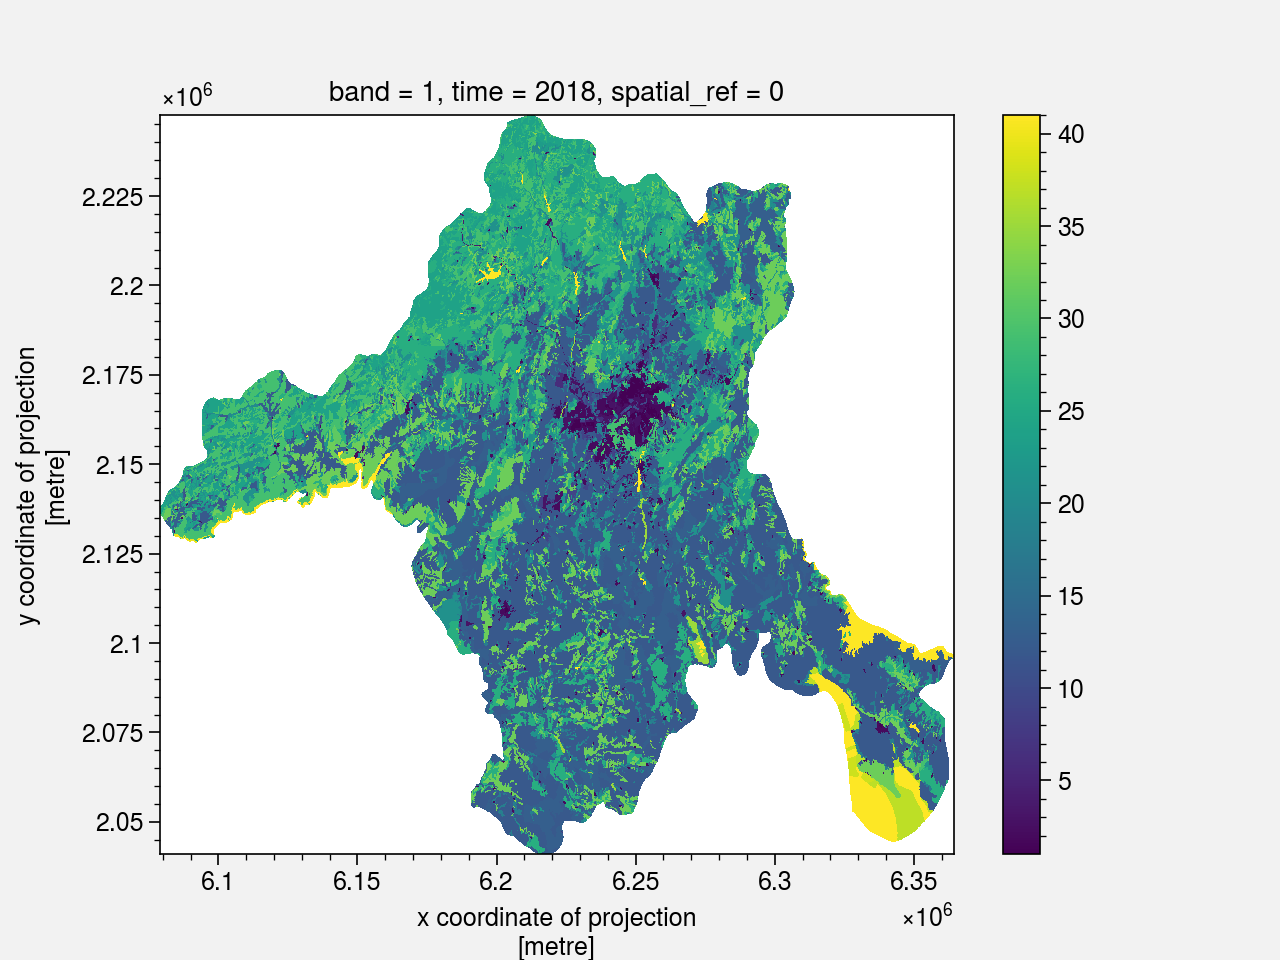

In [6]:
corine.plot()

In [7]:
luse = 'urban'
indexes = define_index_correspondence()
urban_corine = corine.where(~corine.isin(indexes[luse]), 1)
urban_corine = urban_corine.where(urban_corine.isin(indexes[luse]), np.nan)

# assign name
urban_corine.name = 'urban boundaries'

base = urban_corine.plot(subplot_kws=dict(projection=cartopy.crs.Mercator()),
                         )
plt.scatter(metadata['x'], metadata['y'], color='red', s=10, transform=cartopy.crs.PlateCarree())

In [8]:
# projection
proj=cartopy.crs.Mercator()

# fig features
fig_array = [[1,1]
            ]
graphic_no = 1

In [ ]:
# Create Figure -------------------------
fig, axs = proplot.subplots(fig_array, 
                              aspect=4, axwidth=2, proj=proj,
                              hratios=tuple(np.ones(len(fig_array), dtype=int)),
                              includepanels=True, hspace=-0.10, wspace=0.1)
    
    # format lon and lat limits
#axs[0].format(lonlim=(27.7, 30), latlim=(40.5, 41.9), # istanbul
#                  labels=False, longrid=False, latgrid = False)
#axs[0].format(lonlim=(26, 28.7), latlim=(37.8, 39.5), # izmir
#                  labels=False, longrid=False, latgrid = False) 
axs[0].format(lonlim=(30.8, 33.9), latlim=(38.5, 40.8), # ankara
                  labels=False, longrid=False, latgrid = False)


    # add shapefiles
turkey_district_shape = r'data/shapefiles/istanbul_ankara_izmir_shapefile.shp'
shape_district_turkey = ShapelyFeature(Reader(turkey_district_shape).geometries(),
                                                 cartopy.crs.PlateCarree(), facecolor='none',
                                                 edgecolor = 'black', linewidth = 0.1, zorder = 0.3)

turkey_province_shape = r'data/shapefiles/Iller_HGK_6360_Kanun_Sonrasi.shp'
shape_province_turkey = ShapelyFeature(Reader(turkey_province_shape).geometries(),
                                                 cartopy.crs.PlateCarree(), facecolor='none',
                                                 edgecolor = 'black', linewidth = 0.5, zorder = 0.4)

for i in range(graphic_no):
    axs[i].add_feature(shape_district_turkey)
    axs[i].add_feature(shape_province_turkey) 
    
    
# plot
mesh = axs[0].pcolormesh(corine['x'], corine['y'],
                                 corine, 
                                 zorder = 0.2)

In [14]:
urban_corine.sel(y=40, x=28, method='nearest')

<xarray.DataArray ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    y            float64 2.041e+06
    x            float64 6.079e+06
    band         int64 1
    time         int64 2018
    spatial_ref  int64 0
Attributes: (12/13)
    RepresentationType:      THEMATIC
    STATISTICS_COVARIANCES:  139.8656147919413
    STATISTICS_MAXIMUM:      48
    STATISTICS_MEAN:         24.548340358237
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    ...                      ...
    STATISTICS_STDDEV:       11.826479391262
    scale_factor:            1.0
    add_offset:              0.0
    data-source:             corine
    province:                ankara
    _FillValue:              -128

In [ ]:
base = urban_corine.plot(
    subplot_kws=dict(projection=cartopy.crs.Mercator()),
    transform=cartopy.crs.PlateCarree())

AttributeError: 'QuadMesh' object has no property 'proj'

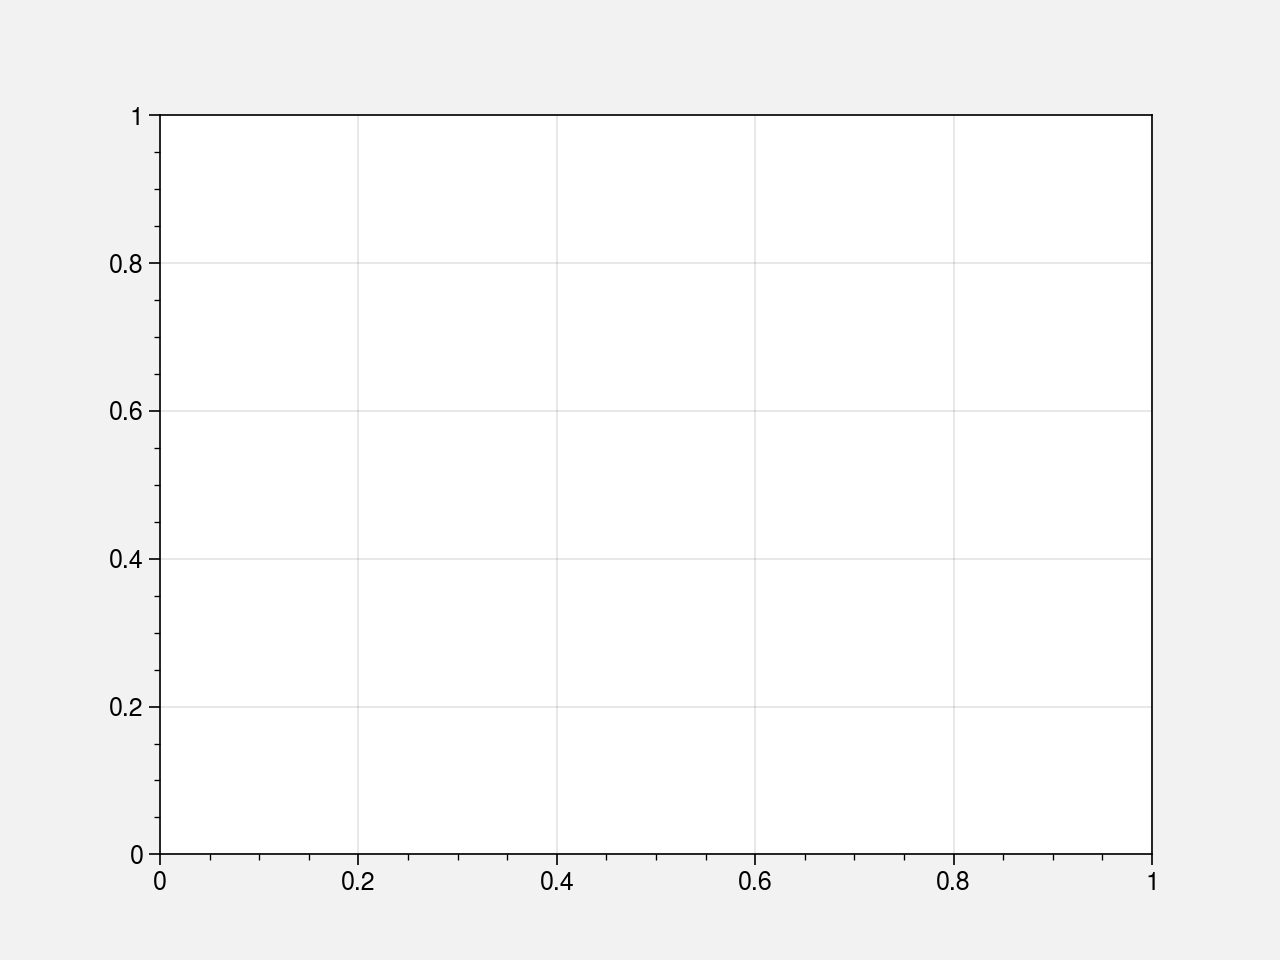

In [27]:
base = urban_corine.plot(proj = cartopy.crs.PlateCarree())
plt.scatter(metadata['x'], metadata['y'], color='red', s=10, )

In [ ]:
# find urban rural areas